# Real Data Experiments 

These libraries below are only used to plot. Algorithm does not contain any external libraries for a fair comparison.
You may want to install the following libraries for running the code manually:
> `numpy` `pandas` `matplotlib`, `pickle`

If you just want to check the plots, you can just look at the notebook as we already printed plots here.

#### Preparation

1. Load libraries we need

In [1]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
from matplotlib import rc
rc('text.latex', preamble=r'\usepackage[cm]{sfmath}')
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

/home/zed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  This is separate from the ipykernel package so we can avoid doing imports until


2. Define functions for plotting

In [2]:
def plotLineGraph(ax, datasets, supportset, lim1, lim2=7200, maxv=np.inf, lb=False):
    for dataset in datasets:
        ax = ax or plt.gca()
        supportToPlot = supportset
        dataUN = [results["Unnamed"][dataset][i][-1] if i in results["Unnamed"][dataset] else maxv for i in supportToPlot]
        dataKL = [results["KL"][dataset][i][-1] if i in results["KL"][dataset] else maxv for i in supportToPlot]
        dataHDFS = [results["HDFS"][dataset][i][-1] if i in results["HDFS"][dataset] else maxv for i in supportToPlot]
        dataTP = [results["TP"][dataset][i][-1] if i in results["TP"][dataset] else maxv for i in supportToPlot]
        dataSTIPA = [results["STIPA"][dataset][i][-1] if i in results["STIPA"][dataset] else maxv for i in supportToPlot]
        
        ax.plot(supportToPlot, dataHDFS, linewidth=1,  color='green',  label="HDFS", marker='v')
        ax.plot(supportToPlot, dataKL, linewidth=1, color='red',label="KarmaLegoD", marker='s')
        ax.plot(supportToPlot, dataTP, linewidth=2,  color='silver',  linestyle="--", label="TPMiner", marker='D', zorder=1)
        ax.plot(supportToPlot, dataSTIPA, linewidth=1, color='brown',  label="STIPA", marker='p')
        ax.plot(supportToPlot, dataUN, linewidth=1, color='blue', label="Z-Miner", marker='o')
        ax.set_xlabel("Minimum Support", labelpad=1)
        ax.set_ylabel("Time (seconds)", labelpad=1)
        ax.tick_params(axis='both', which='major', pad=1)
        if dataset == "ASL_BU_1":
            dataset = "ASL-BU-1"
        if dataset == "ASL_BU_2":
            dataset = "ASL-BU-2"
        ax.set_title(dataset)
        ax.set_xticks(supportToPlot)
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        if lb == True:
            ax.legend(prop={'size': 8})
        ax.set_ylim((lim1, lim2))
        ax.set_xlim((supportset[0], supportset[-1]))
        ax.set_yscale("log")
        ax.grid(True, linestyle='dotted')
        return ax

def plotLineGraphMultipleGaps(ax, datasets, supportset, lim1, lim2=7200, maxv=np.inf, lb=False):
    for dataset in datasets:
        ax = ax or plt.gca()
        supportToPlot = supportset
        dataUN = [results["Unnamed"][dataset][i][-1] if i in results["Unnamed"][dataset] else maxv for i in supportToPlot]
        dataKL = [results["KL"][dataset][i][-1] if i in results["KL"][dataset] else maxv for i in supportToPlot]
        dataUN1 = [results_gap[0.1]["Unnamed"][dataset][i][-1] if i in results_gap[0.1]["Unnamed"][dataset] else maxv for i in supportToPlot]
        dataKL1 = [results_gap[0.1]["KL"][dataset][i][-1] if i in results_gap[0.1]["KL"][dataset] else maxv for i in supportToPlot]
        dataUN2 = [results_gap[0.5]["Unnamed"][dataset][i][-1] if i in results_gap[0.5]["Unnamed"][dataset] else maxv for i in supportToPlot]
        dataKL2 = [results_gap[0.5]["KL"][dataset][i][-1] if i in results_gap[0.5]["KL"][dataset] else maxv for i in supportToPlot]

        ax.plot(supportToPlot, dataKL, linewidth=1, color='red',label="KLD 0%", marker='o')
        ax.plot(supportToPlot, dataKL2, linewidth=1, linestyle=":", color='red',  label="KLD 50%", marker='o')  
        ax.plot(supportToPlot, dataKL1, linewidth=1, linestyle="--", color='red',label="KLD 10%", marker='o')      
        ax.plot(supportToPlot, dataUN, linewidth=1, color='blue', label="Z 0%", marker='o')
        ax.plot(supportToPlot, dataUN2, linewidth=1, linestyle=":", color='blue',  label="Z 50%", marker='o')
        ax.plot(supportToPlot, dataUN1, linewidth=1, linestyle="--", color='blue', label="Z 10%", marker='o')
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_xlabel("Minimum Support", labelpad=1)
        ax.set_ylabel("Time (seconds)", labelpad=1)
        ax.tick_params(axis='both', which='major', pad=1)
        if dataset == "ASL_BU_1":
            dataset = "ASL-BU-1"
        if dataset == "ASL_BU_2":
            dataset = "ASL-BU-2"
        ax.set_title(dataset)
        ax.set_xticks(supportToPlot)
        if lb == True:
            ax.legend(prop={'size': 8}, ncol=2)
        ax.set_ylim((lim1, lim2))
        ax.set_xlim((supportset[0], supportset[-1]))
        ax.set_yscale("log")
        ax.grid(True, linestyle='dotted')
        return ax
    
def plotBarChart(ax, datasets, supportset, maxv=0, lb=False):
    for dataset in datasets:
        ax = ax or plt.gca()
        supportToPlot = supportset
        dataUN = [results["Unnamed"][dataset][i][0] if i in results["Unnamed"][dataset] else maxv for i in supportToPlot ]
        dataKL = [results["KL"][dataset][i][0] if i in results["KL"][dataset] else maxv for i in supportToPlot ]
        dataHDFS = [results["HDFS"][dataset][i][0] if i in  results["HDFS"][dataset] else maxv for i in  supportToPlot]
        dataTemp = pd.DataFrame({"X": sorted(supportToPlot, reverse=True), "Z-Miner": dataUN, "KarmaLegoD": dataKL, "HDFS": dataHDFS})
        dataTemp.plot(ax = ax, x="X", y=["Z-Miner", "KarmaLegoD", "HDFS"], kind="bar", color=['blue', 'red', 'green'])
        if lb == True:
            ax.legend(prop={'size': 8})
        else:
            ax.get_legend().remove()
        ax.set_yscale("log")
        ax.set_xlabel("Minimum Support")
        ax.set_ylabel("Hash Hit Count")
        if dataset == "ASL_BU_1":
            dataset = "ASL-BU-1"
        if dataset == "ASL_BU_2":
            dataset = "ASL-BU-2"
        ax.set_title(dataset)
        ax.set_xticklabels(["0.10", "0.09", "0.08", "0.07", "0.06", "0.05", "0.04"], rotation='horizontal')
        #ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.yaxis.grid(True, linestyle='dotted')
        #plt.xticks([3,5,10,15,20,25,30,40,50])
        #plt.legend()
        return ax

def plotPatternBarChart(ax, datasets, supportset, epsilon, maxv=0, lb=False):
    for dataset in datasets:
        ax = ax or plt.gca()
        supportToPlot = supportset
        dataUN = [results_epsilon[epsilon]["Unnamed"][dataset][i][1] if i in results_epsilon[epsilon]["Unnamed"][dataset] else maxv for i in supportToPlot ]
        dataKL = [results_epsilon[epsilon]["KL"][dataset][i][1] if i in results_epsilon[epsilon]["KL"][dataset] else maxv for i in supportToPlot ]
        dataHDFS = [results_epsilon[epsilon]["HDFS"][dataset][i][1] if i in  results_epsilon[epsilon]["HDFS"][dataset] else maxv for i in  supportToPlot]
        dataTemp = pd.DataFrame({"X": sorted(supportToPlot, reverse=True), "Z-Miner": dataUN, "KarmaLegoD": dataKL, "HDFS": dataHDFS})
        dataTemp.plot(ax = ax, x="X", y=["Z-Miner", "HDFS", "KarmaLegoD"], kind="bar", color=['blue', 'green', 'red'])
        ax.set_xlabel("Minimum Support", labelpad=1)
        ax.set_ylabel("Number of Arrangements", labelpad=1)
        ax.tick_params(axis='both', which='major', pad=1)
        ax.set_title(dataset+" / $\epsilon$ = "+str(epsilon))
        ax.set_xticklabels(supportset, rotation='horizontal')
        ax.yaxis.grid(True, linestyle='dotted')
        if lb == True:
            ax.legend(prop={'size': 7})
        else:
            ax.get_legend().remove()
        #plt.xticks([3,5,10,15,20,25,30,40,50])
        #plt.legend()
        return ax

####  Experiment results

1. Load the results

These are the experiment results from the five algorithms (KarmaLegoD, HDFS, STIPA, TPMiner, and ZMiner)

In [3]:
results_gap = pickle.load(open("results_gap.p", "rb"))
print("THERE IS THE RESULT ALREADY CALCULATED")
results = pickle.load(open("results_nogap.p", "rb"))
print("THERE IS THE RESULT ALREADY CALCULATED")
results_epsilon = pickle.load(open("results_epsilon.p", "rb"))
print("THERE IS THE RESULT ALREADY CALCULATED")

THERE IS THE RESULT ALREADY CALCULATED
THERE IS THE RESULT ALREADY CALCULATED
THERE IS THE RESULT ALREADY CALCULATED


#### Time comparison - without a gap

This is the main experiment we conducted with the eight real-world datasets to show the superiority of **Z-Miner** compared to other recent algorithms

1. Print the plots

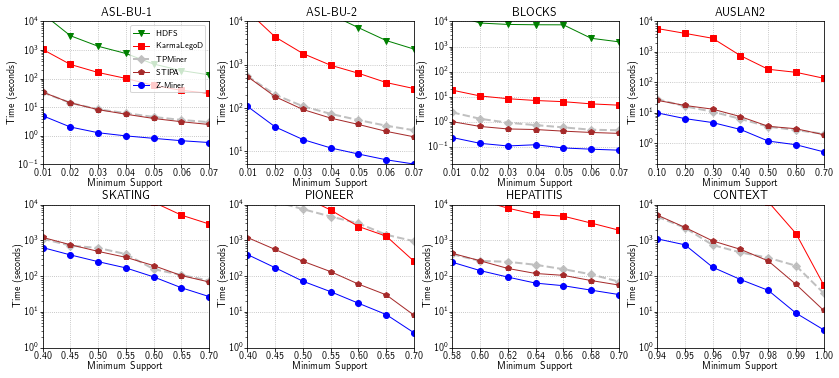

In [4]:
fig1, (axes) = plt.subplots(ncols=4, nrows=2, figsize=(14,6))
plt.subplots_adjust(hspace = 0.28, wspace=0.23)
plotLineGraph(axes[0, 0], ["ASL_BU_1"], [0.01,0.02,0.03,0.04,0.05,0.06,0.07], 1/10, 10000, np.inf, True)
plotLineGraph(axes[0, 1], ["ASL_BU_2"], [0.01,0.02,0.03,0.04,0.05,0.06,0.07], 5, 10000)
plotLineGraph(axes[0, 2], ["BLOCKS"], [0.01,0.02,0.03,0.04,0.05,0.06,0.07], 1/50, 10000)
plotLineGraph(axes[0, 3], ["AUSLAN2"], [0.10,0.20,0.30,0.40,0.50,0.60,0.70], 1/5, 10000)
plotLineGraph(axes[1, 0], ["SKATING"], [0.40,0.45,0.50,0.55,0.60,0.65,0.70], 1, 10000)
plotLineGraph(axes[1, 1], ["PIONEER"], [0.40,0.45,0.50,0.55,0.60,0.65,0.70], 1, 10000)
plotLineGraph(axes[1, 2], ["HEPATITIS"], [0.58,0.60,0.62,0.64,0.66,0.68,0.70], 1, 10000)
plotLineGraph(axes[1, 3], ["CONTEXT"], [0.94,0.95,0.96,0.97,0.98,0.99,1.00], 1, 10000)
plt.show()

Save them into the file

In [5]:
fig1.savefig('realDataExperiment_1.pdf', bbox_inches = "tight")

#### Time comparison - with a gap 

This is an experiment on the same eight datasets, but with setting a gap. Here the gap is percentage of the average e-sequence length of each dataset.

1. Print the plots

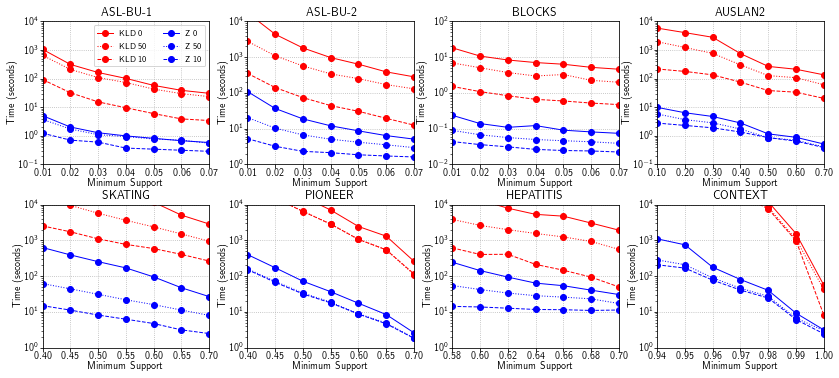

In [6]:
fig2, (axes) = plt.subplots(ncols=4, nrows=2, figsize=(14,6))
plt.subplots_adjust(hspace = 0.28, wspace=0.23)
plotLineGraphMultipleGaps(axes[0, 0], ["ASL_BU_1"], [0.01,0.02,0.03,0.04,0.05,0.06,0.07], 1/10, 10000, np.inf, True)
plotLineGraphMultipleGaps(axes[0, 1], ["ASL_BU_2"], [0.01,0.02,0.03,0.04,0.05,0.06,0.07], 1, 10000)
plotLineGraphMultipleGaps(axes[0, 2], ["BLOCKS"], [0.01,0.02,0.03,0.04,0.05,0.06,0.07], 1/100, 100)
plotLineGraphMultipleGaps(axes[0, 3], ["AUSLAN2"], [0.10,0.20,0.30,0.40,0.50,0.60,0.70], 1/10, 10000)
plotLineGraphMultipleGaps(axes[1, 0], ["SKATING"], [0.40,0.45,0.50,0.55,0.60,0.65,0.70], 1, 10000)
plotLineGraphMultipleGaps(axes[1, 1], ["PIONEER"], [0.40,0.45,0.50,0.55,0.60,0.65,0.70], 1, 10000)
plotLineGraphMultipleGaps(axes[1, 2], ["HEPATITIS"],  [0.58,0.60,0.62,0.64,0.66,0.68,0.70], 1, 10000)
plotLineGraphMultipleGaps(axes[1, 3], ["CONTEXT"], [0.94,0.95,0.96,0.97,0.98,0.99,1.00], 1, 10000)
plt.show()

2. Save them into the file

In [7]:
fig2.savefig('realDataExperiment_2.pdf', bbox_inches = "tight")

#### Hash hit counts

We only have the hash hits for hash-based (candidate-based) algorithms as it would be a fair comparison. We only have the data from the experiment that converged in time limit (10,000 sec)

1. Print the plots

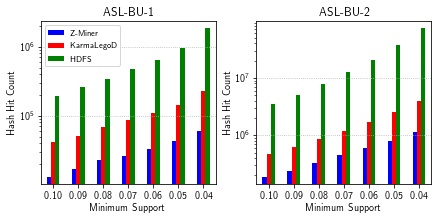

In [8]:
fig3, (axes) = plt.subplots(ncols=2, figsize=(7,3))
plt.subplots_adjust(wspace=0.23)
plotBarChart(axes[0], ["ASL_BU_1"], [0.10,0.09,0.08,0.07,0.06,0.05,0.04], 0, True)
plotBarChart(axes[1], ["ASL_BU_2"], [0.10,0.09,0.08,0.07,0.06,0.05,0.04])

2. Save them into the file

In [9]:
fig3.savefig('realDataExperiment_3.pdf', bbox_inches = "tight")

#### Epsilon experiments

Epsilon experiment is performed to show the vulnerability of KarmaLego and transitivity concept. Here the epsilon is percentage of the average e-sequence length of each dataset.

1. Print the plots

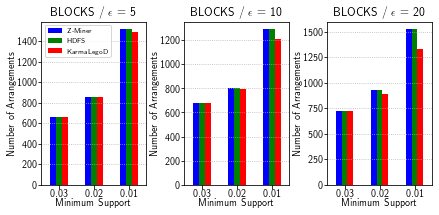

In [10]:
fig4, (axes) = plt.subplots(ncols=3, figsize=(7,3))
plt.subplots_adjust(wspace = 0.36)
plotPatternBarChart(axes[0,], ["BLOCKS"], [0.03,0.02,0.01], 5, 0, True)
plotPatternBarChart(axes[1], ["BLOCKS"], [0.03,0.02,0.01], 10)
plotPatternBarChart(axes[2], ["BLOCKS"], [0.03,0.02,0.01], 20)

2. Save them into the file

In [11]:
fig4.savefig('realDataExperiment_4.pdf', bbox_inches = "tight")